In [1]:


import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df

,permutation,time
0,"(0, 1, 2, 3, 4)",13.826996
1,"(0, 1, 2, 3, 4)",14.719000
2,"(0, 1, 2, 3, 4)",15.049000
3,"(0, 1, 2, 3, 4)",15.058002
4,"(0, 1, 2, 3, 4)",15.136001
...,...,...
2395,"(4, 3, 2, 1, 0)",22.977000
2396,"(4, 3, 2, 1, 0)",22.993001
2397,"(4, 3, 2, 1, 0)",22.964003
2398,"(4, 3, 2, 1, 0)",23.052001


<AxesSubplot: >

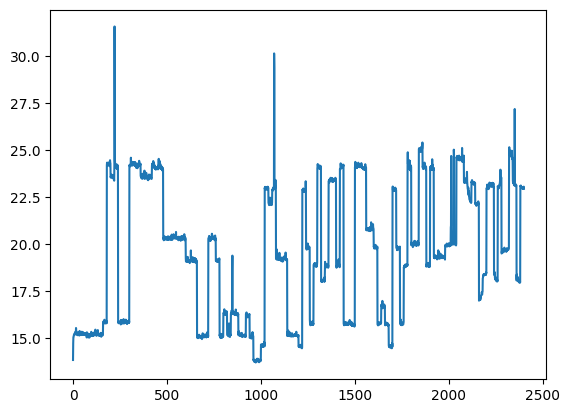

In [3]:
df.time.plot()

In [4]:
df_grouped_perm = df.groupby('permutation').mean().sort_values(by='time')
display(df_grouped_perm)

fastest_10_permutations = df_grouped_perm.head(10)
display(fastest_10_permutations)

slowest_10_permutations = df_grouped_perm.tail(10)
display(slowest_10_permutations)

fastest_30_permutations = df_grouped_perm.head(30)
slowest_30_permutations = df_grouped_perm.tail(30)

,time
permutation,
"(2, 0, 1, 3, 4)",13.789752
"(2, 0, 1, 4, 3)",13.796209
"(3, 2, 0, 1, 4)",14.551613
"(2, 3, 0, 1, 4)",14.555042
"(2, 0, 3, 1, 4)",14.597333
...,...
"(4, 1, 0, 3, 2)",24.527808
"(4, 1, 0, 2, 3)",24.564977
"(0, 2, 4, 3, 1)",24.676228


,time
permutation,
"(2, 0, 1, 3, 4)",13.789752
"(2, 0, 1, 4, 3)",13.796209
"(3, 2, 0, 1, 4)",14.551613
"(2, 3, 0, 1, 4)",14.555042
"(2, 0, 3, 1, 4)",14.597333
"(1, 2, 3, 4, 0)",15.057650
"(1, 2, 4, 0, 3)",15.079992
"(1, 4, 3, 2, 0)",15.099834
"(1, 3, 2, 4, 0)",15.100835


,time
permutation,
"(3, 2, 4, 1, 0)",24.188350
"(0, 3, 4, 2, 1)",24.208164
"(0, 3, 4, 1, 2)",24.237657
"(0, 3, 2, 4, 1)",24.253912
"(0, 2, 3, 4, 1)",24.266008
"(4, 1, 0, 3, 2)",24.527808
"(4, 1, 0, 2, 3)",24.564977
"(0, 2, 4, 3, 1)",24.676228
"(4, 3, 1, 0, 2)",24.756552


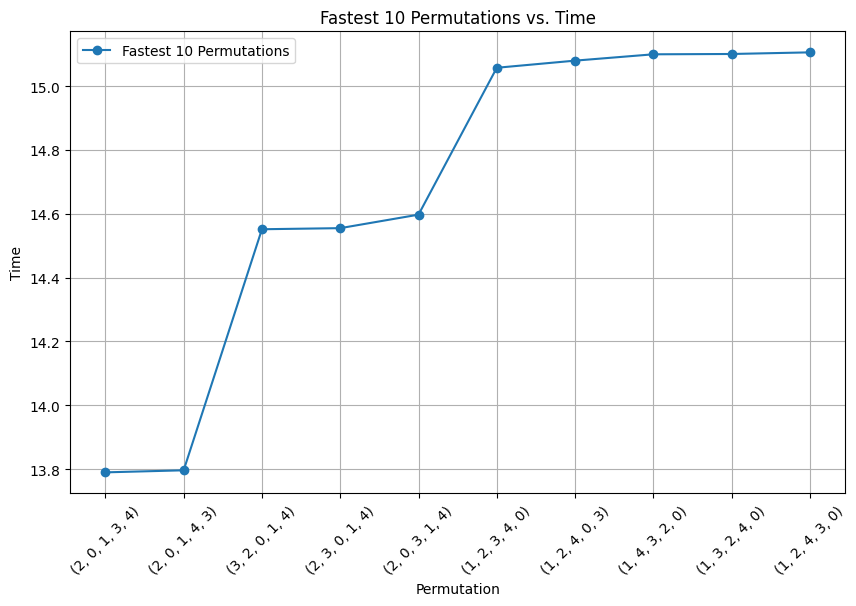

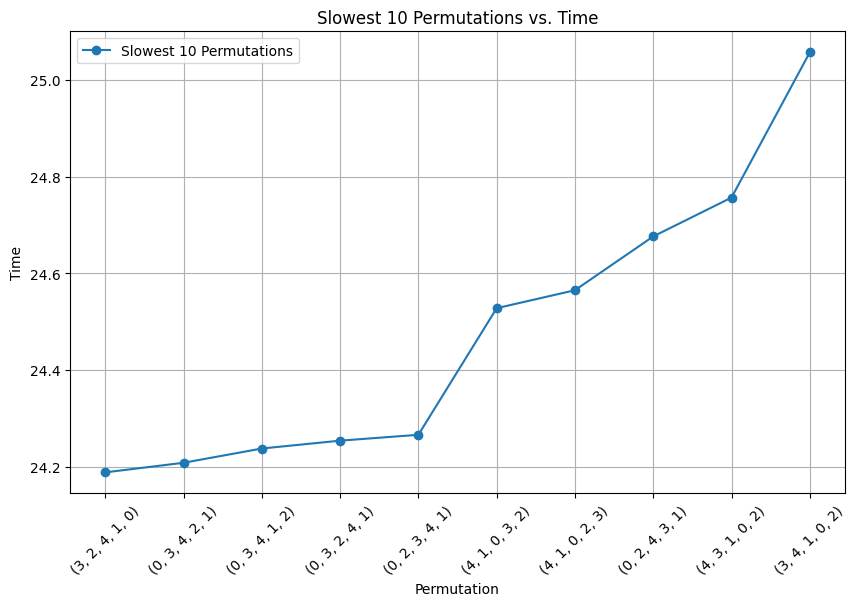

In [5]:
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(fastest_10_permutations.index, fastest_10_permutations['time'], marker='o', label='Fastest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Fastest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

# Plotting the slowest 10 permutations as a line plot
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(slowest_10_permutations.index, slowest_10_permutations['time'], marker='o', label='Slowest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Slowest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

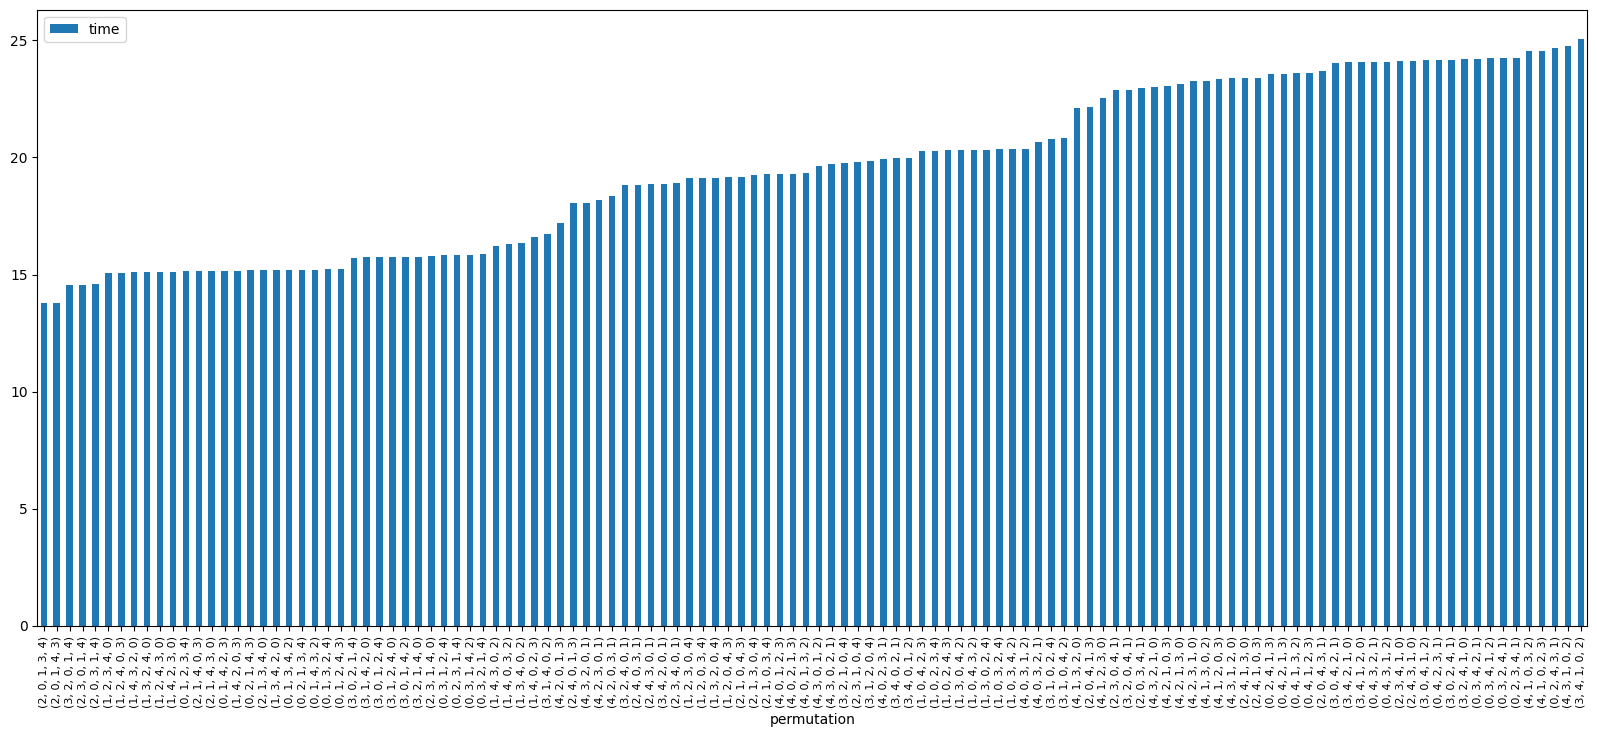

In [6]:
plotted = df_grouped_perm.plot(kind='bar', figsize=(20, 8)) 

# Rotate the x-axis labels 
plt.xticks(rotation=90, fontsize=8)

plt.show()


In [44]:
import numpy as np
df_grouped_perm = df_grouped_perm.merge(df.groupby('permutation').std(), left_index=True, right_index=True)

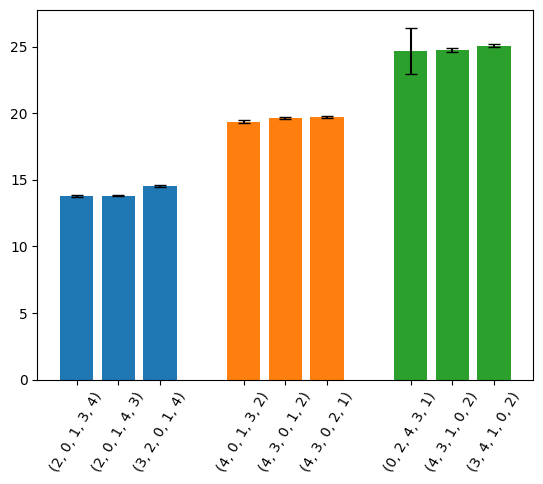

In [57]:
xticks = [[], []]
for i, f in zip(range(0, 11, 4), [df_grouped_perm.iloc[:3],
                               df_grouped_perm.iloc[len(df_grouped_perm)//2-1:len(df_grouped_perm)//2+2],
                               df_grouped_perm.iloc[-3:]]):
    plt.bar(np.arange(3) + i, f.time_x)
    for j, (_, row) in zip(np.arange(3) + i, f.iterrows()):
        plt.errorbar(j, row.time_x, row.time_y, c='black', capsize=4)
    xticks[0].extend(np.arange(3) + i)
    xticks[1].extend(f.index)
plt.xticks(*xticks, rotation=60)
plt.savefig("sparse_bars.png")
plt.show()

In [7]:
from scipy.stats import f_oneway


# Create lists of times 
fastest_times_values = fastest_30_permutations['time'].values.tolist()
slowest_times_values = slowest_30_permutations['time'].values.tolist()

# Perform ANOVA test
f_statistic, p_value = f_oneway(fastest_times_values, slowest_times_values)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means.")


ANOVA F-Statistic: 5361.002986128065
ANOVA p-value: 7.522498106944917e-59
Reject the null hypothesis: There is a significant difference between means.
